# Introduction
##### This is an analysis on a Superstore. The goal is to analyze the stores data , discover trends and patterns of the customers consumption/order and giving the store insight based on this findings to help in decision making , improve revenue and customer retention.

### Provided info:
##### #Shipping details 
##### #Customer details
##### #Customer ordered product details

## Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

## Import the Superstore data

In [2]:
data = pd.read_excel('Sample_Superstore2.xlsx')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
#getting the total rows and column contained in the dataset
data.shape

(9994, 21)

In [4]:
#getting the column names
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [5]:
#getting the dataypes of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [6]:
#checking for null values
data.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

## Data Cleaning
### The data is in the required datatypes

## Analysis

### 1. Total number of Actual Customers the Store has?
### 2. How many days does it takes to ship a product ordered a customer?
### 3. What are the diverse ways products are being shipped?
### 4. Where are most customers from(State,City)?
### 5. Top 5 most ordered product(category/sub-category)?
### 6. Amount of order over time?
### 7. Were they any loss  incurred?
### 8. What is the top 5 customer(get the sum of the total of the cost of product by each customer)?

## 1. Total number of Actual Customers the Store has?

In [7]:
#getting the total number of the actual customers the store has.
customer_no = len(data['Customer ID'].unique())
print(f"The total number of customer in the store is {customer_no}")

The total number of customer in the store is 793


In [8]:
#getting the unique values of the different types of customer
data.Segment.unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [9]:
#getting the total number of each segment of customer
data.Segment.value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

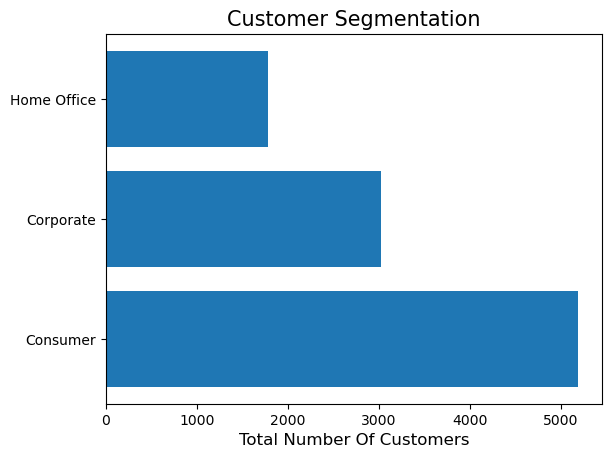

In [10]:
#displaying the diverse customers 
plt.barh(data.Segment.value_counts().index, data.Segment.value_counts())
plt.title('Customer Segmentation',fontsize=15)
plt.xlabel('Total Number Of Customers',fontsize=12)


plt.show()

## 2. How many days does it takes to ship a product ordered by a customer?

## Figure this 👆  out

In [11]:
#getting how many days for an ordered product to be shipped 
# data['day_b4_ship'] = data['Ship Date'].dt.day - data['Order Date'].dt.day
# data.day_b4_ship

## 3. What are the diverse ways products are being shipped?

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [13]:
#getting ways the products are being shipped
data['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [14]:
#count of orders per ship mode
ship_modes = data['Ship Mode'].value_counts()
ship_modes

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

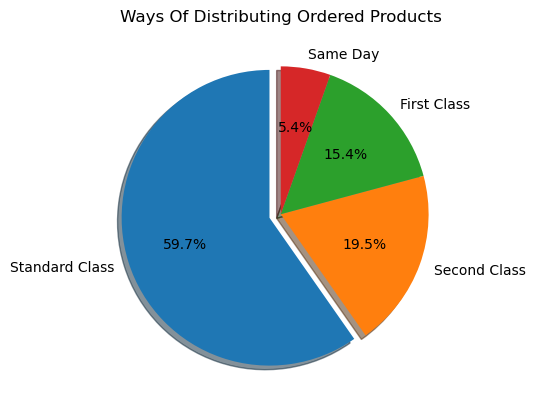

In [15]:
#displaying the ship modes using a pie chart
plt.pie(ship_modes, labels = ship_modes.index,explode=[0.08,0,0,0], shadow=True, startangle=90, autopct='%1.1f%%')
plt.title('Ways Of Distributing Ordered Products')
plt.show()

In [16]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## 4. Where are most customers from(State,City)...Top 10 States?

In [17]:
#number of states customers are from
len(data['State'].unique())

49

In [18]:
#number of city customers are from
len(data['City'].unique())

531

In [19]:
data[['State', 'City']]

,State,City
0,Kentucky,Henderson
1,Kentucky,Henderson
2,California,Los Angeles
3,Florida,Fort Lauderdale
4,Florida,Fort Lauderdale
...,...,...
9989,Florida,Miami
9990,California,Costa Mesa
9991,California,Costa Mesa
9992,California,Costa Mesa


In [20]:
#getting the number of customer per state
state_grouped = data.groupby('State').agg(no_of_states = ('City','count')).sort_values(by = 'no_of_states', ascending = False).head(10)
state_grouped

,no_of_states
State,
California,2001
New York,1128
Texas,985
Pennsylvania,587
Washington,506
Illinois,492
Ohio,469
Florida,383
Michigan,255


In [21]:
customer_loc = data.groupby('State').agg(no_of_customer = ('Customer Name','count')).sort_values(by = 'no_of_customer', ascending = False).head(10)
customer_loc.head(10)

,no_of_customer
State,
California,2001
New York,1128
Texas,985
Pennsylvania,587
Washington,506
Illinois,492
Ohio,469
Florida,383
Michigan,255


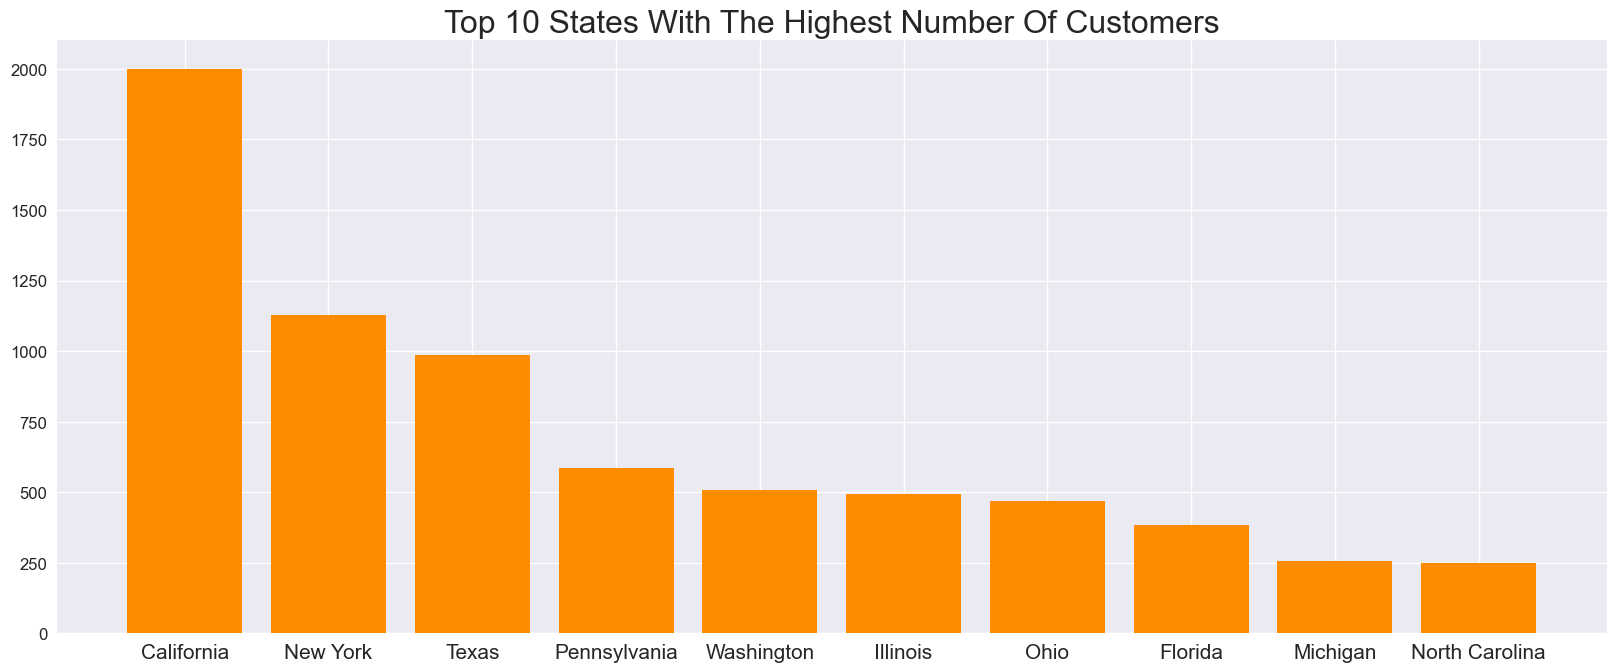

In [22]:
plt.style.use('seaborn-v0_8')
plt.figure(figsize=[20,7.7])
plt.bar(customer_loc.index, customer_loc['no_of_customer'], color='darkorange')

plt.xticks(fontsize=15)
plt.yticks(fontsize=12)

plt.title('Top 10 States With The Highest Number Of Customers',fontsize=23)

plt.show()

In [61]:
data['Region'].unique( )

array(['South', 'West', 'Central', 'East'], dtype=object)

In [70]:
region_grouped = data.groupby('Region').agg(count_of_region = ('Region','count')).sort_values(by ='count_of_region', ascending = False)
region_grouped

,count_of_region
Region,
West,3203
East,2848
Central,2323
South,1620


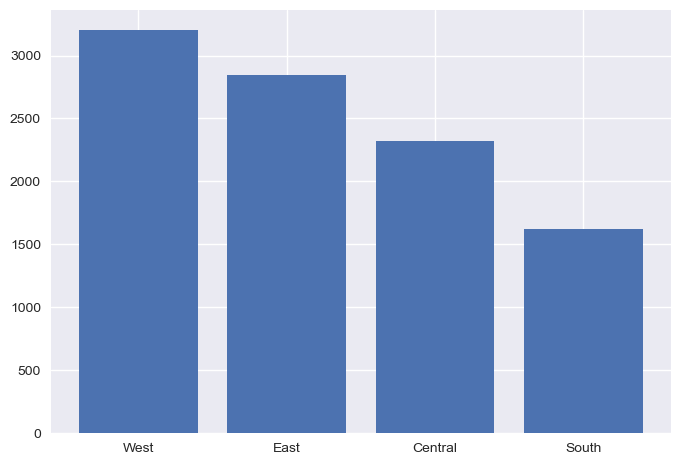

In [71]:
plt.bar(region_grouped.index, region_grouped['count_of_region'])

plt.show()

## 5. Top 15 most ordered products (category/sub-category)?

In [23]:
#getting the category of products sold in the store
data['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [24]:
data['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

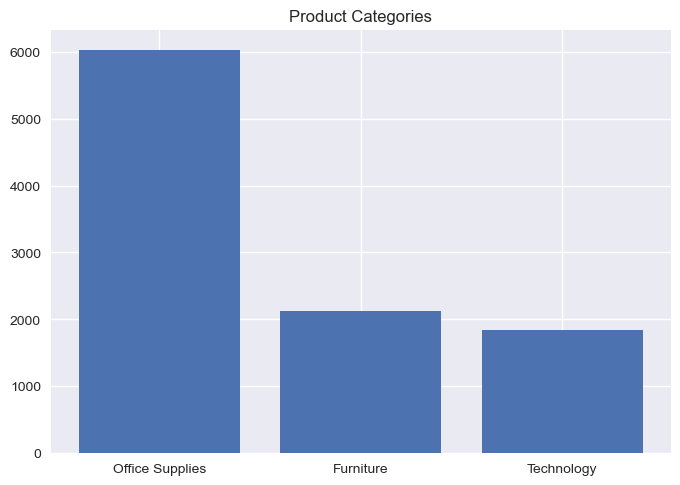

In [25]:
plt.bar(data['Category'].value_counts().index, data['Category'].value_counts())

plt.title('Product Categories')

plt.show()

In [26]:
#getting the sub-category of products sold in the store
data['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [27]:
data['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [28]:
categories = data.sort_values(by='Sub-Category')[['Category','Sub-Category']]
categories.head()

,Category,Sub-Category
5725,Technology,Accessories
5065,Technology,Accessories
5053,Technology,Accessories
5049,Technology,Accessories
5037,Technology,Accessories


In [29]:
tech_cat = categories[categories['Category']== 'Technology'].value_counts()
tech_cat

Category    Sub-Category
Technology  Phones          889
            Accessories     775
            Machines        115
            Copiers          68
dtype: int64

In [30]:
a = tech_cat.to_frame()
a

0
Category   Sub-Category     
Technology Phones        889
           Accessories   775
           Machines      115
           Copiers        68

In [31]:
# a['Category']

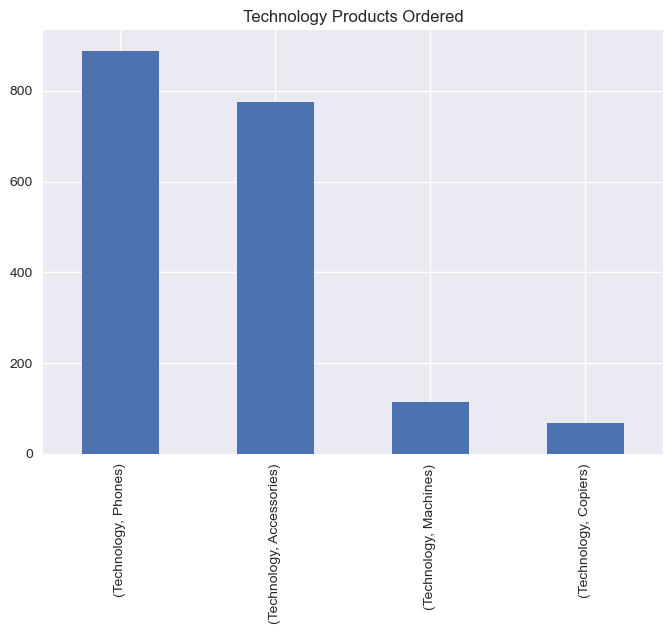

In [43]:
tech_cat.plot(kind='bar')
plt.title('Technology Products Ordered')
plt.xlabel('')

plt.show()

In [33]:
furni_cat = categories[categories['Category']== 'Furniture'].value_counts()
furni_cat

Category   Sub-Category
Furniture  Furnishings     957
           Chairs          617
           Tables          319
           Bookcases       228
dtype: int64

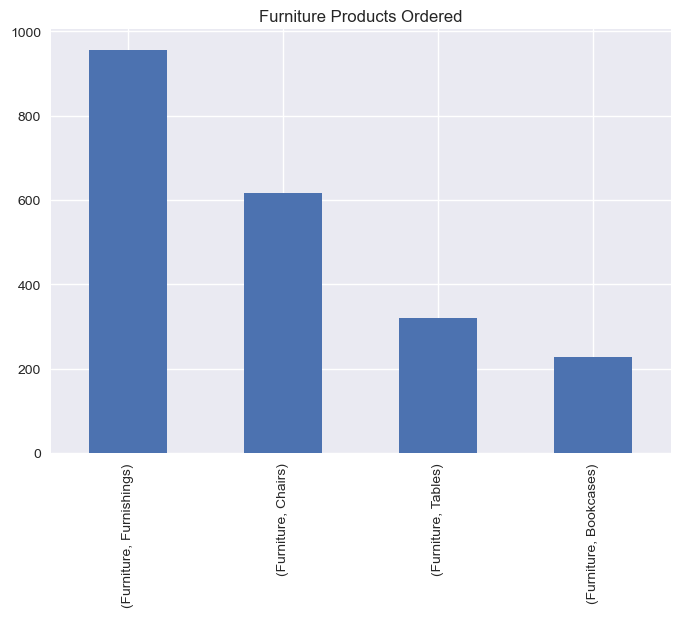

In [34]:
furni_cat.plot(kind='bar')
plt.title('Furniture Products Ordered')
plt.xlabel('')

plt.show()

In [35]:
off_cat = categories[categories['Category']== 'Office Supplies'].value_counts()
off_cat

Category         Sub-Category
Office Supplies  Binders         1523
                 Paper           1370
                 Storage          846
                 Art              796
                 Appliances       466
                 Labels           364
                 Envelopes        254
                 Fasteners        217
                 Supplies         190
dtype: int64

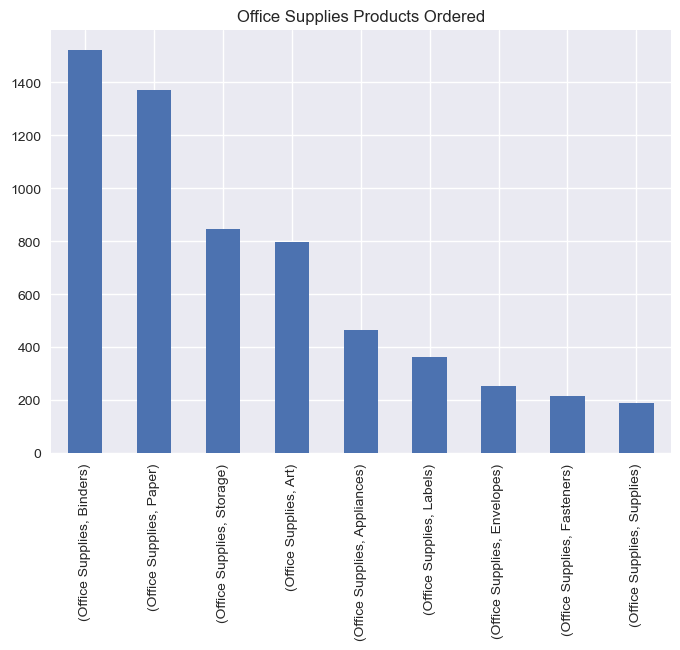

In [36]:
off_cat.plot(kind='bar')
plt.title('Office Supplies Products Ordered')
plt.xlabel('')

plt.show()

## 6. Amount of order over time?

In [53]:
data['orders']= data['Order Date'].dt.month
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,orders
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10


In [50]:
order = data.groupby('orders').agg(order_over_time=('Order ID','count'))
order

,order_over_time
orders,
1,381
2,300
3,696
4,668
5,735
6,717
7,710
8,706
9,1383


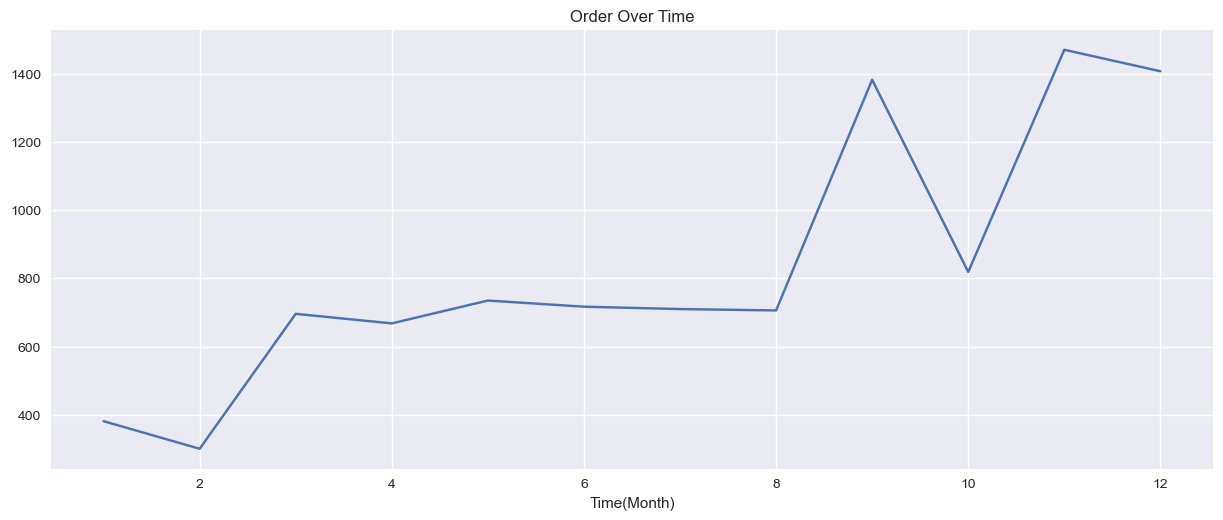

In [57]:
plt.figure(figsize=[15,5.7])
plt.plot(order.index, order)
plt.title('Order Over Time')
plt.xlabel('Time(Month)')

plt.show()

In [74]:
data1 = data.copy()
data1

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,orders
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,1
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,2
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,2
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,2


In [75]:
data1.drop('orders', axis=1,inplace=True)

## 7. Were they any loss incurred?

In [77]:
data1.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## 8. What is the top 5 customer(get the sum of the total of the cost of product by each customer)?

In [108]:
top_cus =  data.groupby('Customer Name').agg(sum_of_products=('Sales','sum')).sort_values(by = 'sum_of_products', ascending=False).head(5)
top_cus

,sum_of_products
Customer Name,
Sean Miller,25043.050
Tamara Chand,19052.218
Raymond Buch,15117.339
Tom Ashbrook,14595.620
Adrian Barton,14473.571


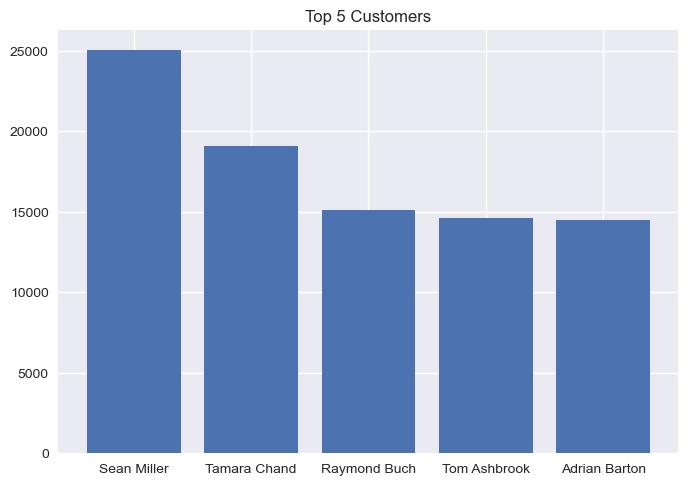

In [112]:
plt.bar(top_cus.index, top_cus['sum_of_products'])
plt.title('Top 5 Customers')
plt.show()

# How do I solve No 2 and 7???? 🤔 